##1등코드 2등코드 모두 feature engineering을 하지않음

일반적 기계학습-> feature engineering 필수

NN->feature engineering필요 X, 그래서 요즘 NN이 인기(?)

In [1]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [2]:
ls

 기계학습_플젝1.gslides   data_mdc01.zip         'test_(16, 19)_0.001_100.pth'
 기계학습_플젝1.pptx     '제목 없는 문서.gdoc'    test.csv
 8aheM3LWpJ.mp4          'My image model.tm'      train.csv
'Colab Notebooks'/        sample_submission.csv


In [3]:
!nvidia-smi

Fri Feb  5 03:20:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

In [5]:
import pandas as pd
import numpy as np

##target data: layer_1, layer_2, layer_3,layer_4

In [6]:
train=pd.read_csv("train.csv")

In [7]:
test=pd.read_csv("test.csv")

In [8]:
test=test.drop(labels='id',axis=1)

In [9]:
submit=pd.read_csv("sample_submission.csv")

In [10]:
import torch
import torchvision.datasets as data
import torchvision.transforms as transforms
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from itertools import chain
import torch.nn as nn
import math
import time
from tqdm.auto import tqdm



---

##from itertools import chain

Python 에서 제공하는 자신만의 반복자를 만드는 모듈

1등 코드에서는 validation set 구성하는데에 쓰임

저는 train_test_split사용했습니다


In [ ]:
layers = [['layer_1','layer_2','layer_3','layer_4'], [str(i) for i in np.arange(0,226).tolist()]]
layers = list(chain(*layers))

In [ ]:
layers

['layer_1',
 'layer_2',
 'layer_3',
 'layer_4',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '130',
 '131',
 '132'



---



1등코드에서는 10000개의 데이터를 가진 val set구성함

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
  torch.cuda.manual_seed_all(777)

In [12]:
# 학습 파라미터 설정
#시간관계쌍 epoch를 13으로
learning_rate = 1e-3
epochs = 13
batch_size = 2048
adam_epsilon = 1e-06
warmup_step = 2000
Scaler = StandardScaler()

In [13]:
x_train=train.iloc[:,4:]
y_train=train.iloc[:,0:4]

In [14]:
x_train1, x_val, y_train1, y_val= train_test_split(x_train,y_train,test_size=0.013,random_state=1)

In [15]:
x_train1.shape,x_val.shape

((799470, 226), (10530, 226))

In [16]:
x_train1=np.array(x_train1)
x_val=np.array(x_val)

y_train1=np.array(y_train1)
y_val=np.array(y_val)

In [17]:
x_train1=torch.FloatTensor(x_train1)
x_val=torch.FloatTensor(x_val)
y_train1=torch.FloatTensor(y_train1)
y_val=torch.FloatTensor(y_val)

#train, val dataset

In [18]:
train_dataset = torch.utils.data.TensorDataset(x_train1, y_train1)

val_dataset=torch.utils.data.TensorDataset(x_val, y_val)

#train,val dataloader

num_workers 파라미터 관련 : [참고](https://jybaek.tistory.com/799)


In [19]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True,
                                          num_workers=1)

val_loader = torch.utils.data.DataLoader(dataset=val_dataset,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True,
                                         num_workers=1)

1등코드는 활성함수로 GELU를 사용함

1등은 직접짰는데 pytorch에서 제공하길래 그걸로 썼다.

참고 document (https://pytorch.org/docs/stable/generated/torch.nn.GELU.html)

In [ ]:
class GELU(nn.Module):
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * torch.pow(x, 3))))

In [21]:
GELU=torch.nn.GELU()

##Layer normalizaion 

pytorch에서도 제공하고 있긴 했다.

참고 document (https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html)

In [ ]:
class LayerNorm(torch.nn.Module):
    def __init__(self, hidden_size, eps=1e-5):
        """Construct a layernorm module in the TF style (epsilon inside the square root).
        """
        super(LayerNorm, self).__init__()

        self.weight = nn.Parameter(torch.ones(hidden_size))
        self.bias = nn.Parameter(torch.zeros(hidden_size))
        self.variance_epsilon = eps

        self.init_weights()

    def init_weights(self):
        self.weight.data.fill_(1.0)
        self.bias.data.zero_()

    def forward(self, x):
        u = x.mean(-1, keepdim=True)
        s = (x - u).pow(2).mean(-1, keepdim=True)
        x = (x - u) / torch.sqrt(s + self.variance_epsilon)
        return self.weight * x + self.bias

#모델 : skipConnectionModel

1. LayerNormalization   - pytorch 제공
2. 활성함수 : GELU()    - pytorch 제공
3.  upblock - 각 레이어에서의 입출력 노드 갯수 늘리기
4. downblock - 각 레이어에서의 입출력 노드 갯수 줄이기
5. BatchNormalization   - pytorch 제공
6. skipblock - skipconnection하는 block  

      [참고] https://lv99.tistory.com/25


기존 1등코드와 다른 점: pytorch에서 제공하는 함수를 최대한으로 사용

In [22]:
class skipConnectionModel(nn.Module):
    def __init__(self):
        super(skipConnectionModel, self).__init__()
        
        self.ln = nn.LayerNorm(10000)
        self.ln1 = nn.LayerNorm(7000)
        self.ln2 = nn.LayerNorm(4000)
        self.ln3 = nn.LayerNorm(2000)
        
        self.upblock1 = nn.Sequential(nn.Linear(226, 2000),nn.GELU(),nn.BatchNorm1d(2000))
        self.upblock2 = nn.Sequential(nn.Linear(2000,4000),nn.GELU(),nn.BatchNorm1d(4000))
        self.upblock3 = nn.Sequential(nn.Linear(4000,7000), nn.GELU(),nn.BatchNorm1d(7000))
        self.upblock4 = nn.Sequential(nn.Linear(7000,10000),nn.GELU(),nn.BatchNorm1d(10000))

        self.downblock1 = nn.Sequential(nn.Linear(10000, 7000),nn.GELU(),nn.BatchNorm1d(7000))
        self.downblock2 = nn.Sequential(nn.Linear(7000, 4000),nn.GELU(),nn.BatchNorm1d(4000))
        self.downblock3 = nn.Sequential(nn.Linear(4000, 2000),nn.GELU(),nn.BatchNorm1d(2000))
        self.downblock4 = nn.Sequential(nn.Linear(2000, 300),nn.GELU(),nn.BatchNorm1d(300))
        
        self.fclayer = nn.Sequential(nn.Linear(300,4))
        #fc layer 초기화 (초기화 방법이 중요하다 배웠었다.)
        #torch.nn.init.kaiming_uniform(self.fclayer.weight)
        self.dropout = nn.Dropout(0.1)
        
    def forward(self, x):
        upblock1_out = self.upblock1(x)
        upblock2_out = self.upblock2(upblock1_out)
        upblock3_out = self.upblock3(upblock2_out)
        upblock4_out = self.upblock4(upblock3_out)
        
        downblock1_out = self.downblock1(self.ln(upblock4_out))
        skipblock1 = downblock1_out + upblock3_out
        downblock2_out = self.downblock2(self.ln1(skipblock1))
        skipblock2 = downblock2_out + upblock2_out
        downblock3_out = self.downblock3(self.ln2(skipblock2))
        skipblock3 = downblock3_out + upblock1_out
        downblock4_out = self.downblock4(self.ln3(skipblock3))
        
        output = self.fclayer(downblock4_out)
        
        return output

## Learning rate warmup 스케줄링

 1등코드는 아래 링크에서 코드를 따온거 같습니다

 https://huggingface.co/transformers/_modules/transformers/optimization.html#get_cosine_with_hard_restarts_schedule_with_warmup


 pytorch에서 제공하는 다양한 lr_스케줄링

[참고]  https://pytorch.org/docs/stable/optim.html

비슷한 맥락으로, SGD optimizer 일경우, momentum scheduler도 구현할 수 있다.

[참고] https://easy-going-programming.tistory.com/10?category=919874

In [23]:
def get_cosine_with_hard_restarts_schedule_with_warmup(
    optimizer, num_warmup_steps, num_training_steps, num_cycles=1.0, last_epoch=-1
):
    """ Create a schedule with a learning rate that decreases following the
    values of the cosine function with several hard restarts, after a warmup
    period during which it increases linearly between 0 and 1.
    """

    def lr_lambda(current_step):
        if current_step < num_warmup_steps:
            return float(current_step) / float(max(1, num_warmup_steps))
        progress = float(current_step - num_warmup_steps) / float(max(1, num_training_steps - num_warmup_steps))
        if progress >= 1.0:
            return 0.0
        return max(0.0, 0.5 * (1.0 + math.cos(math.pi * ((float(num_cycles) * progress) % 1.0))))

    return LambdaLR(optimizer, lr_lambda, last_epoch)

##최적화 

마찬가지로 아래서 코드 따온거 같습니다

https://huggingface.co/transformers/_modules/transformers/optimization.html#AdamW

pytorch에서 제공하는 것과 거의 같은데 디폴트파라미터(weight_dacay)만 조금 다른거 같습니다

AdamW 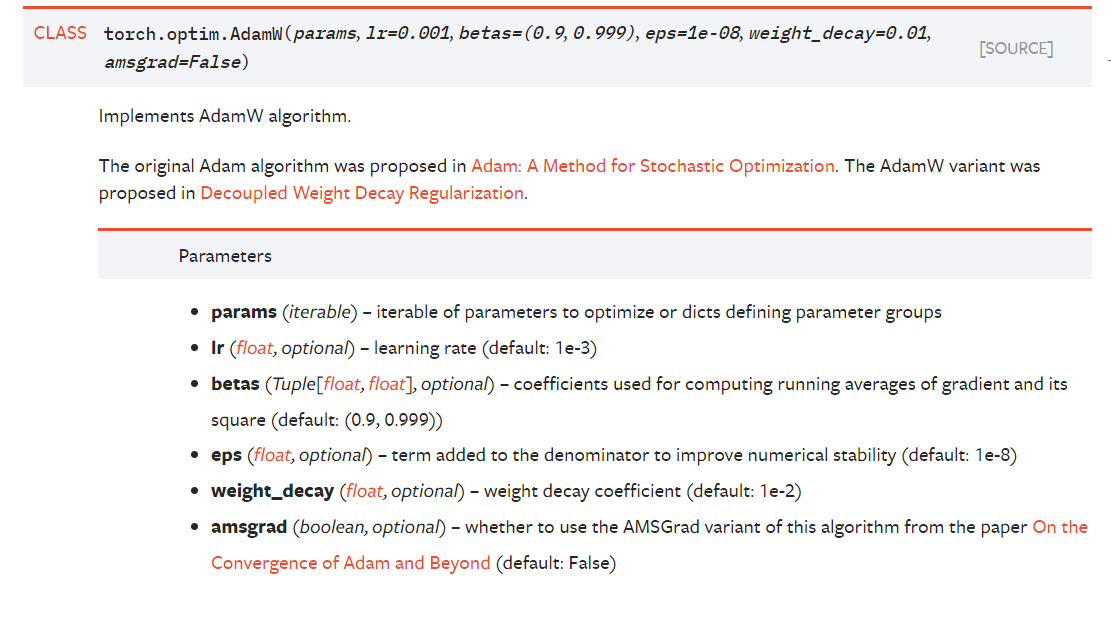

In [24]:
model=skipConnectionModel().to(device)

In [25]:
model.named_parameters

<bound method Module.named_parameters of skipConnectionModel(
  (ln): LayerNorm((10000,), eps=1e-05, elementwise_affine=True)
  (ln1): LayerNorm((7000,), eps=1e-05, elementwise_affine=True)
  (ln2): LayerNorm((4000,), eps=1e-05, elementwise_affine=True)
  (ln3): LayerNorm((2000,), eps=1e-05, elementwise_affine=True)
  (upblock1): Sequential(
    (0): Linear(in_features=226, out_features=2000, bias=True)
    (1): GELU()
    (2): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (upblock2): Sequential(
    (0): Linear(in_features=2000, out_features=4000, bias=True)
    (1): GELU()
    (2): BatchNorm1d(4000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (upblock3): Sequential(
    (0): Linear(in_features=4000, out_features=7000, bias=True)
    (1): GELU()
    (2): BatchNorm1d(7000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (upblock4): Sequential(
    (0): Linear(in_features=7000, out_features=10000, 

In [26]:
model.parameters

<bound method Module.parameters of skipConnectionModel(
  (ln): LayerNorm((10000,), eps=1e-05, elementwise_affine=True)
  (ln1): LayerNorm((7000,), eps=1e-05, elementwise_affine=True)
  (ln2): LayerNorm((4000,), eps=1e-05, elementwise_affine=True)
  (ln3): LayerNorm((2000,), eps=1e-05, elementwise_affine=True)
  (upblock1): Sequential(
    (0): Linear(in_features=226, out_features=2000, bias=True)
    (1): GELU()
    (2): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (upblock2): Sequential(
    (0): Linear(in_features=2000, out_features=4000, bias=True)
    (1): GELU()
    (2): BatchNorm1d(4000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (upblock3): Sequential(
    (0): Linear(in_features=4000, out_features=7000, bias=True)
    (1): GELU()
    (2): BatchNorm1d(7000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (upblock4): Sequential(
    (0): Linear(in_features=7000, out_features=10000, bias=T

In [27]:
optimizer = torch.optim.AdamW(model.parameters(),eps=adam_epsilon,lr=learning_rate)

본 대회 평가기준이 MAE이므로 L1Loss 사용

[참고] https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html#torch.nn.L1Loss

In [28]:
loss_fn = nn.L1Loss().to(device)

일단 pytorch에서 제공하는걸로 해봄


In [29]:
scheduler =torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer,T_0=250)



---



아래 두 셀은 원본코드에 있던 부분인데 잘 모르겠습니다 ㅠㅠ

In [30]:
no_decay = ["bias", "LayerNorm.weight"] # decay하지 않을 영역 지정.
optimizer_grouped_parameters = [
    {
        "params": [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
        "weight_decay": 0.0,
    },
    {"params": [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)], "weight_decay": 0.0},
]



In [31]:
optimizer_grouped_parameters

[{'params': [Parameter containing:
   tensor([1., 1., 1.,  ..., 1., 1., 1.], device='cuda:0', requires_grad=True),
   Parameter containing:
   tensor([1., 1., 1.,  ..., 1., 1., 1.], device='cuda:0', requires_grad=True),
   Parameter containing:
   tensor([1., 1., 1.,  ..., 1., 1., 1.], device='cuda:0', requires_grad=True),
   Parameter containing:
   tensor([1., 1., 1.,  ..., 1., 1., 1.], device='cuda:0', requires_grad=True),
   Parameter containing:
   tensor([[-0.0556, -0.0012, -0.0129,  ...,  0.0377, -0.0557,  0.0475],
           [ 0.0424,  0.0070, -0.0142,  ...,  0.0363, -0.0646,  0.0526],
           [ 0.0606, -0.0512, -0.0051,  ...,  0.0161,  0.0449, -0.0496],
           ...,
           [ 0.0554,  0.0474,  0.0489,  ..., -0.0223,  0.0104, -0.0448],
           [ 0.0426,  0.0338,  0.0430,  ..., -0.0479,  0.0325, -0.0021],
           [ 0.0076,  0.0586, -0.0013,  ...,  0.0240,  0.0190,  0.0417]],
          device='cuda:0', requires_grad=True),
   Parameter containing:
   tensor([1., 1.



---



In [32]:
# train loss와 val loss 지정.
total_loss = 0.0
total_val_loss = 0.0

# 모델 이름을 위해서 변수 만듦.
version = time.localtime()[3:5]
curr_lr = learning_rate

n_val_loss = 10000000. # 가장 낮은 validation loss를 저장하기 위해서 변수 설정.

In [33]:
total_step = len(train_loader) * epochs
print(f"Total step is....{total_step}") # 모델이 학습하는 전체 step 계산.

Total step is....5070


## 모델 저장하는 부분

https://tutorials.pytorch.kr/beginner/saving_loading_models.html

In [34]:
for epoch in range(epochs):
    total_loss=0
    total_val_loss=0

    for i,(X_train, Y_train) in enumerate(tqdm(train_loader, desc='*********Train mode*******')):

        X_train = X_train.float().to(device)
        Y_train = Y_train.float().to(device)

        # 그래디언트 초기화
        optimizer.zero_grad()
        # Forward 계산
        hypothesis = model(X_train)
        # Error 계산
        loss = loss_fn(hypothesis, Y_train)
        # Backparopagation
        loss.backward()
        # 가중치 갱신
        optimizer.step()
        #lr 스케줄러 갱신
        scheduler.step()

        total_loss += loss.item()
        # 평균 Error 계산
      
    train_loss = total_loss / len(train_loader)
    
    print ("Epoch [{}/{}], Train Loss: {:.4f}".format(epoch+1, epochs, train_loss))



    model.eval()

    with torch.no_grad():
      for i,(X_val, Y_val) in enumerate(tqdm(val_loader, desc='*********Evaluation mode*******')):
        X_val=X_val.float().to(device)
        Y_val=Y_val.float().to(device)

        hypothesis = model(X_val)
        loss_val = loss_fn(hypothesis,Y_val)

        total_val_loss += loss_val.item()


    val_loss = total_val_loss / len(val_loader)
    print ("Epoch [{}/{}], Eval Loss: {:.4f}".format(epoch+1, epochs, val_loss))


    if val_loss < n_val_loss:
      n_val_loss = val_loss
      torch.save(model.state_dict(), f'test_{version}_{learning_rate}_{epochs}.pth')
      print("Best Model saved......")



Epoch [1/13], Train Loss: 143.5669



Epoch [1/13], Eval Loss: 118.7840
Best Model saved......



Epoch [2/13], Train Loss: 65.4715



Epoch [2/13], Eval Loss: 61.6592
Best Model saved......



Epoch [3/13], Train Loss: 56.1761



Epoch [3/13], Eval Loss: 47.9924
Best Model saved......



Epoch [4/13], Train Loss: 45.0825



Epoch [4/13], Eval Loss: 36.1645
Best Model saved......



Epoch [5/13], Train Loss: 17.9672



Epoch [5/13], Eval Loss: 6.9984
Best Model saved......



Epoch [6/13], Train Loss: 6.7474



Epoch [6/13], Eval Loss: 5.1648
Best Model saved......



Epoch [7/13], Train Loss: 3.6238



Epoch [7/13], Eval Loss: 2.2487
Best Model saved......



Epoch [8/13], Train Loss: 3.1925



Epoch [8/13], Eval Loss: 2.4863



Epoch [9/13], Train Loss: 2.2007



Epoch [9/13], Eval Loss: 3.3518



Epoch [10/13], Train Loss: 2.2603



Epoch [10/13], Eval Loss: 1.6831
Best Model saved......



Epoch [11/13], Train Loss: 2.1217



Epoch [11/13], Eval Loss: 2.7005



Epoch [12/13], Train Loss: 1.7856



Epoch [12/13], Eval Loss: 1.1849
Best Model saved......



Epoch [13/13], Train Loss: 1.8630



Epoch [13/13], Eval Loss: 2.6802


#모델평가

In [40]:
x_test=np.array(test)

x_test=torch.FloatTensor(x_test).to(device)

In [ ]:
모델에 학습된 가중치를 업로드

In [39]:
test_model = skipConnectionModel()

weights = torch.load(f'test_{version}_{learning_rate}_{epochs}.pth', map_location='cuda:0')
#모델
weights

OrderedDict([('ln.weight',
              tensor([0.9783, 0.9830, 0.9410,  ..., 0.9450, 1.0961, 1.1804], device='cuda:0')),
             ('ln.bias',
              tensor([ 0.0361, -0.0037, -0.0028,  ...,  0.0089, -0.0156,  0.0107],
                     device='cuda:0')),
             ('ln1.weight',
              tensor([0.9686, 0.9490, 0.9927,  ..., 1.0369, 1.0209, 1.0467], device='cuda:0')),
             ('ln1.bias',
              tensor([ 0.0055,  0.0407,  0.0127,  ...,  0.0362, -0.0057,  0.0047],
                     device='cuda:0')),
             ('ln2.weight',
              tensor([0.9750, 0.9433, 0.9568,  ..., 1.0377, 1.0301, 0.9900], device='cuda:0')),
             ('ln2.bias',
              tensor([-0.0239, -0.0221, -0.0170,  ...,  0.0434,  0.0166, -0.0051],
                     device='cuda:0')),
             ('ln3.weight',
              tensor([1.0685, 0.9336, 1.0144,  ..., 1.0877, 0.9857, 0.9713], device='cuda:0')),
             ('ln3.bias',
              tensor([-0.0146,  0

In [41]:
test_model.load_state_dict(weights)
test_model = test_model.to(device)
test_model.eval()

skipConnectionModel(
  (ln): LayerNorm((10000,), eps=1e-05, elementwise_affine=True)
  (ln1): LayerNorm((7000,), eps=1e-05, elementwise_affine=True)
  (ln2): LayerNorm((4000,), eps=1e-05, elementwise_affine=True)
  (ln3): LayerNorm((2000,), eps=1e-05, elementwise_affine=True)
  (upblock1): Sequential(
    (0): Linear(in_features=226, out_features=2000, bias=True)
    (1): GELU()
    (2): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (upblock2): Sequential(
    (0): Linear(in_features=2000, out_features=4000, bias=True)
    (1): GELU()
    (2): BatchNorm1d(4000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (upblock3): Sequential(
    (0): Linear(in_features=4000, out_features=7000, bias=True)
    (1): GELU()
    (2): BatchNorm1d(7000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (upblock4): Sequential(
    (0): Linear(in_features=7000, out_features=10000, bias=True)
    (1): GELU()
    (2): Batch

In [53]:
with torch.no_grad():
   outputs = test_model(x_test.float())
pred_test = outputs

In [54]:
pred_test=pred_test.cpu().numpy()

In [55]:
pred_test

array([[254.23299 , 228.96086 , 131.60777 ,  84.44279 ],
       [157.61841 , 126.94577 , 237.96707 ,  98.33767 ],
       [148.22346 , 179.29135 , 272.90756 , 156.47118 ],
       ...,
       [ 49.526386, 255.2122  , 262.55524 ,  28.148914],
       [ 33.03871 ,  21.894732, 144.14655 ,  77.73429 ],
       [155.10023 ,  17.560766,  13.291715,  77.159805]], dtype=float32)

In [57]:
submit['layer_1']=pred_test[:,0]
submit['layer_2']=pred_test[:,1]
submit['layer_3']=pred_test[:,2]
submit['layer_4']=pred_test[:,3]
submit

,id,layer_1,layer_2,layer_3,layer_4
0,0,254.232986,228.960861,131.607773,84.442787
1,1,157.618408,126.945770,237.967072,98.337669
2,2,148.223465,179.291351,272.907562,156.471176
3,3,91.662537,228.489197,188.371094,83.554062
4,4,274.375183,295.495453,244.443146,271.275909
...,...,...,...,...,...
9995,9995,113.824776,91.307716,84.376663,56.616219
9996,9996,79.359215,258.380890,123.410713,102.837578
9997,9997,49.526386,255.212204,262.555237,28.148914
9998,9998,33.038712,21.894732,144.146545,77.734291


In [58]:
submit.to_csv("submit.csv",index=False)